<font size="5"> Programme of Study: MSc Applied Artificial Intelligence

Module: Software for Digital Innovation (CIS1028-N)

Student Number: C2349767

Document: COVID Data Analysis

## COVID Data Extraction (preprocessing already done in the previous file)

In [1]:
# Loading the data into pandas

import pandas as pd

raw_data = pd.read_csv("specimenDate_ageDemographic-unstacked.csv")

# Convert 'date' to datetime
raw_data['date'] = pd.to_datetime(raw_data['date'])

# Extract useful columns
df_useful = raw_data.loc[:,['areaType', 'areaName', 'date', 'newCasesBySpecimenDate-0_4','newCasesBySpecimenDate-5_9',
                      'newCasesBySpecimenDate-10_14', 'newCasesBySpecimenDate-15_19', 'newCasesBySpecimenDate-20_24', 
                      'newCasesBySpecimenDate-25_29', 'newCasesBySpecimenDate-30_34', 'newCasesBySpecimenDate-35_39',
                      'newCasesBySpecimenDate-40_44', 'newCasesBySpecimenDate-45_49','newCasesBySpecimenDate-50_54',
                      'newCasesBySpecimenDate-55_59', 'newCasesBySpecimenDate-60_64', 'newCasesBySpecimenDate-65_69',
                      'newCasesBySpecimenDate-70_74', 'newCasesBySpecimenDate-75_79','newCasesBySpecimenDate-80_84',
                      'newCasesBySpecimenDate-85_89', 'newCasesBySpecimenDate-90+', 'newCasesBySpecimenDate-unassigned',
                      'newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+']]

# Rename columns 
df_useful.columns = ['areaType', 'Area_Name', 'Date', 'NewCases_Age_0-4','NewCases_Age_5-9',
                      'NewCases_Age_10-14', 'NewCases_Age_15-19', 'NewCases_Age_20-24', 
                      'NewCases_Age_25-29', 'NewCases_Age_30-34', 'NewCases_Age_35-39',
                      'NewCases_Age_40-44', 'NewCases_Age_45-49','NewCases_Age_50-54',
                      'NewCases_Age_55-59', 'NewCases_Age_60-64', 'NewCases_Age_65-69',
                      'NewCases_Age_70-74', 'NewCases_Age_75-79','NewCases_Age_80-84',
                      'NewCases_Age_85-89', 'NewCases_Age_90+', 'NewCases_Age_unassigned',
                      'NewCases_Age_0-59', 'NewCases_Age_60+']

# Calculate Total Cases per row entry in the data.
df_useful["Total Cases"] = df_useful["NewCases_Age_0-59"] + df_useful["NewCases_Age_60+"] + df_useful["NewCases_Age_unassigned"]

# Its better to have the "Area_Name" column in lowercase to ease the impementation of Console Menu System for the user.
# Especially when we have inputs like "Stockton-on-Tees" that the user may not input as "Stockton-On-Tees" or "Stockton-on-tees"
df_useful['Area_Name'] = df_useful['Area_Name'].str.lower()

df_useful

,areaType,Area_Name,Date,NewCases_Age_0-4,NewCases_Age_5-9,NewCases_Age_10-14,NewCases_Age_15-19,NewCases_Age_20-24,NewCases_Age_25-29,NewCases_Age_30-34,...,NewCases_Age_65-69,NewCases_Age_70-74,NewCases_Age_75-79,NewCases_Age_80-84,NewCases_Age_85-89,NewCases_Age_90+,NewCases_Age_unassigned,NewCases_Age_0-59,NewCases_Age_60+,Total Cases
0,ltla,hartlepool,2020-03-16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,ltla,hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ltla,hartlepool,2020-03-18,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,ltla,hartlepool,2020-03-19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ltla,hartlepool,2020-03-20,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115022,utla,worcestershire,2020-10-28,2,3,3,23,12,15,14,...,3,4,4,4,4,3,3,136,35,174
115023,utla,worcestershire,2020-10-29,4,2,6,6,12,13,20,...,5,8,1,3,1,0,3,137,25,165
115024,utla,worcestershire,2020-10-30,4,4,6,12,16,10,6,...,5,2,6,3,1,1,1,129,27,157
115025,utla,worcestershire,2020-10-31,6,1,7,14,8,13,11,...,7,4,2,1,1,0,0,108,17,125


# Data Analysis and Visualization



### There are 3 kinds of analysis and visualization done.
#### I. Pick an area to visualise: The user can input the preferred area to analyse.
#### II. Pick two areas to visualise and compare. The user can also input the preferred areas to analyse.
#### III. Some deductions from the data.

In [2]:
area_list = df_useful["Area_Name"].unique() 


while True:
    area_name = input("Enter the area name you wish to visualise: ").lower()
    
    if area_name in area_list:
        break
    else:
        print()
        print("Area name is either not available or wrongly spelt. Please try again.")

Enter the area name you wish to visualise: middlesbrough


## 1. Percentage change in recorded cases for an area.

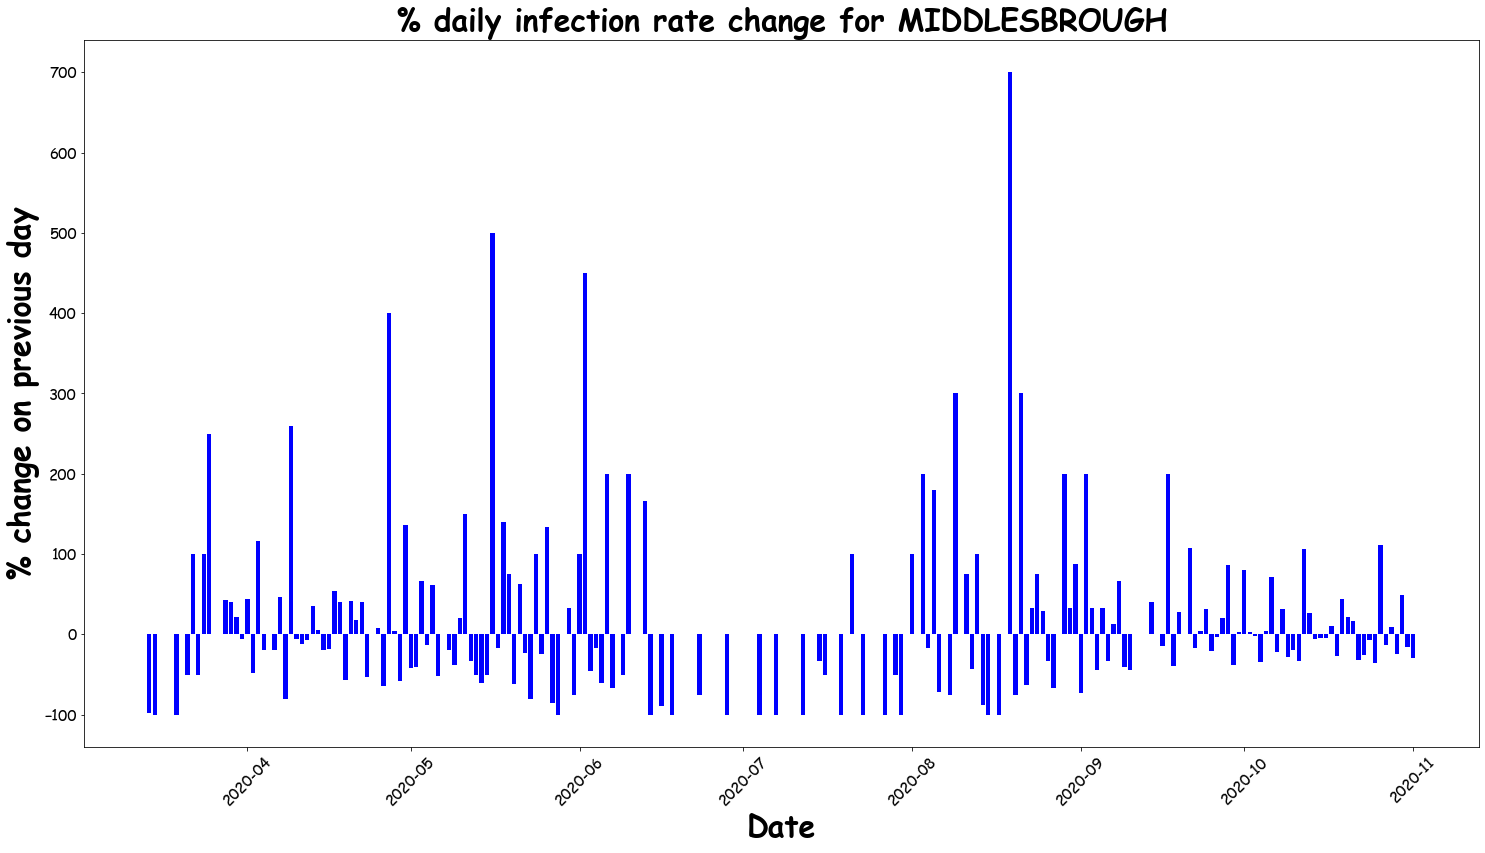

In [3]:
import matplotlib.pyplot as plt

df1 = df_useful[df_useful["Area_Name"] == area_name].copy()
df1['Percent Change in Cases'] =  round(df1['Total Cases'].pct_change() * 100,2)

import useful_functions
useful_functions.BarPlot(df1["Date"], df1["Percent Change in Cases"], title = f"% daily infection rate change for {area_name.upper()}", ylabel= '% change on previous day')

## 2. Daily total and cummulative cases over the date range

In [4]:
df2 = df1.loc[:,["Date", "Total Cases"]]
df2.Date = pd.to_datetime(df2.Date)
df2.set_index('Date', inplace=True)
df2['Cumulative Cases'] = df2['Total Cases'].cumsum()

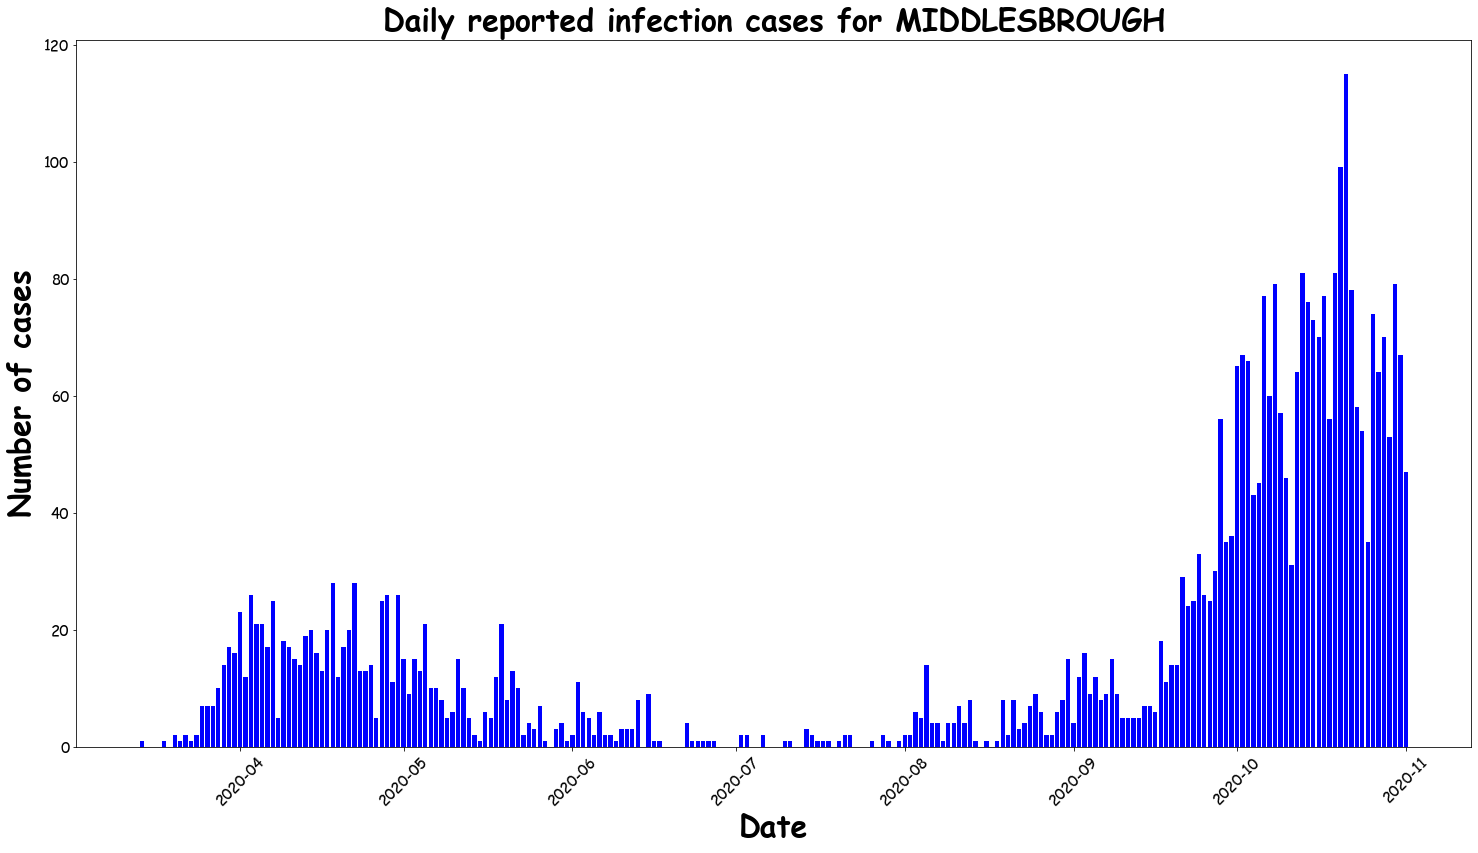

In [5]:
# Total number of cases reported daily.
useful_functions.BarPlot(df2.index.values, df2["Total Cases"], title = f"Daily reported infection cases for {area_name.upper()}", ylabel= 'Number of cases')

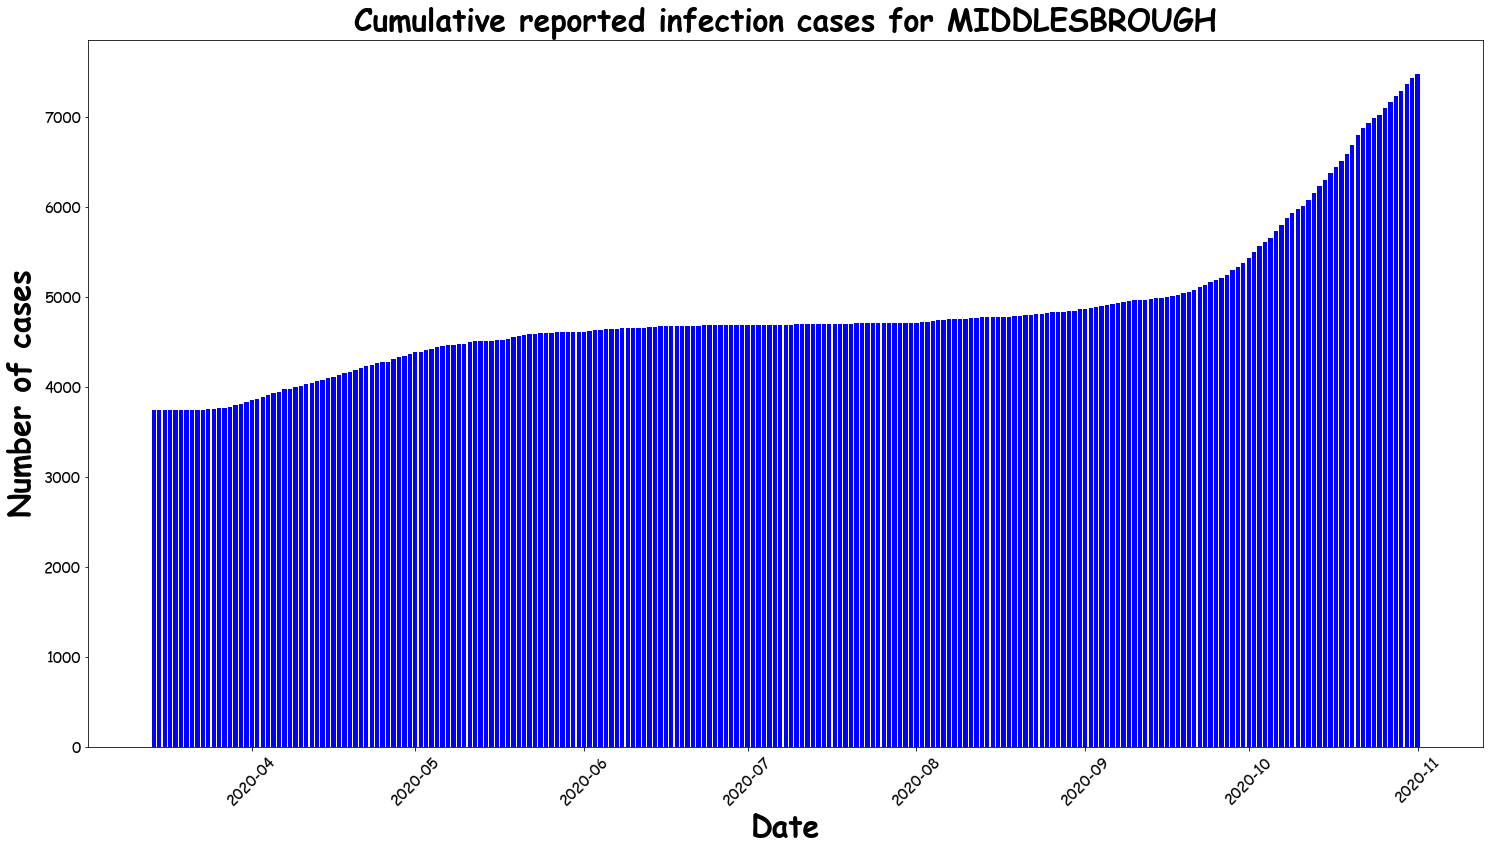

In [6]:
# Cummulative number of cases reported.
useful_functions.BarPlot(df2.index.values, df2["Cumulative Cases"], title = f"Cumulative reported infection cases for {area_name.upper()}", ylabel= 'Number of cases')

## 3. Weekly reported cases

In [7]:
df3 = df2.resample('W').sum()

df3_week = df3["Total Cases"].reset_index()     # reset_index(): to prevent the dataframe from becoming a series


df3_week.rename(columns={'Date': 'Week starting on', 'Total Cases': 'Weekly Total Cases'}, inplace=True)
df3_week.set_index('Week starting on', inplace=True)
print()
print('Total number of cases reported weekly.')
df3_week


Total number of cases reported weekly.


,Weekly Total Cases
Week starting on,
2020-03-15,2
2020-03-22,12
2020-03-29,96
2020-04-05,272
2020-04-12,222
2020-04-19,256
2020-04-26,220
2020-05-03,254
2020-05-10,146


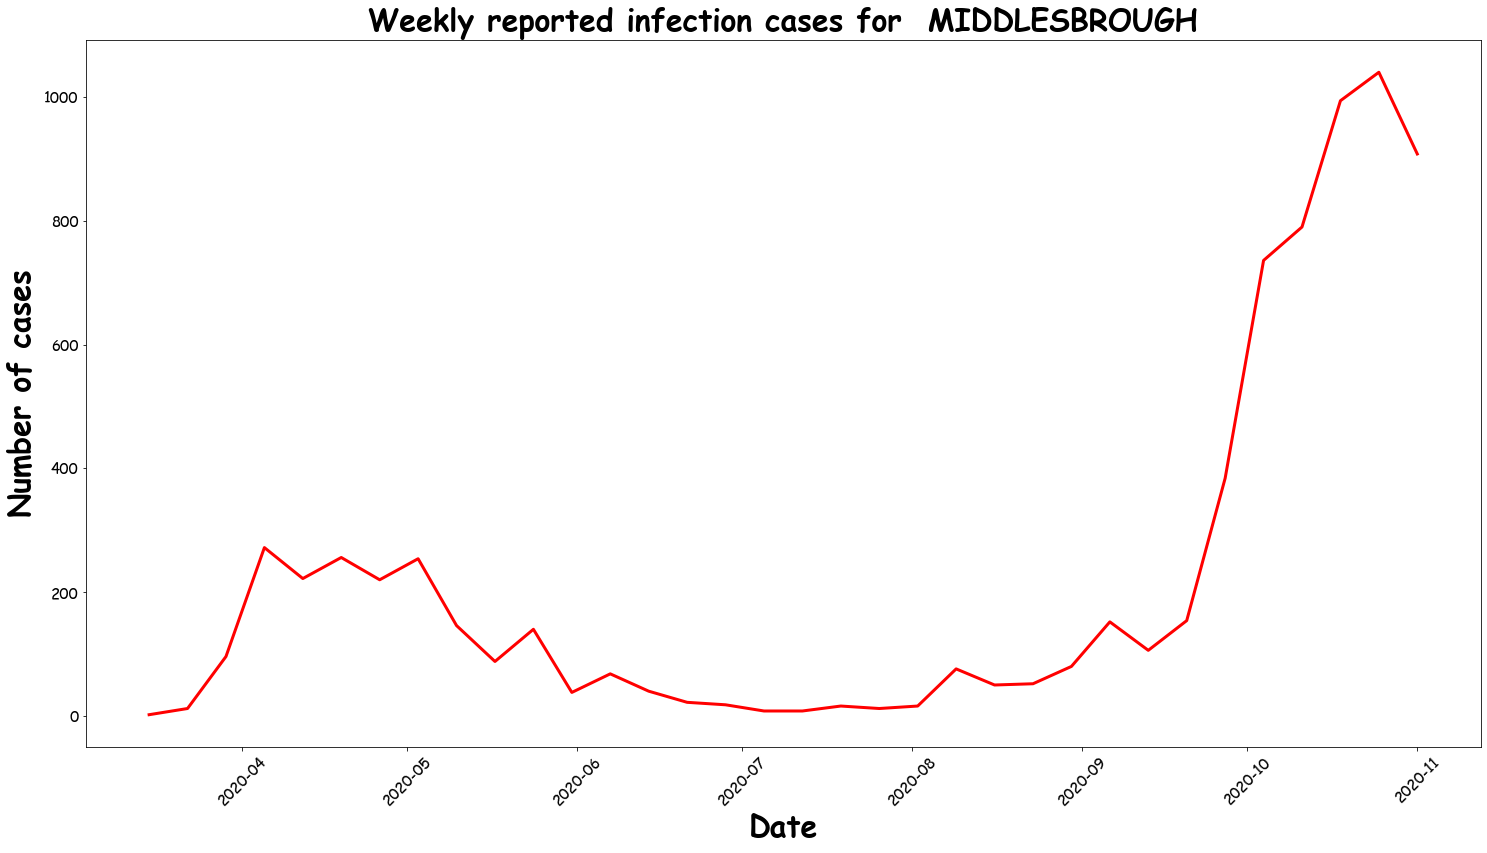

In [8]:
useful_functions.LinePlot(df3_week["Weekly Total Cases"], title = f"Weekly reported infection cases for  {area_name.upper()}", ylabel= 'Number of cases', color='r')

In [9]:
# Add columns showing percentage change and cumulative cases in recorded cases for weekly data.

df3_week['Percent Change in Cases'] =  round(df3_week['Weekly Total Cases'].pct_change() * 100,2)
df3_week['Cumulative Cases'] = df3_week['Weekly Total Cases'].cumsum()

df3_week

,Weekly Total Cases,Percent Change in Cases,Cumulative Cases
Week starting on,,,
2020-03-15,2,NaN,2
2020-03-22,12,500.00,14
2020-03-29,96,700.00,110
2020-04-05,272,183.33,382
2020-04-12,222,-18.38,604
2020-04-19,256,15.32,860
2020-04-26,220,-14.06,1080
2020-05-03,254,15.45,1334
2020-05-10,146,-42.52,1480


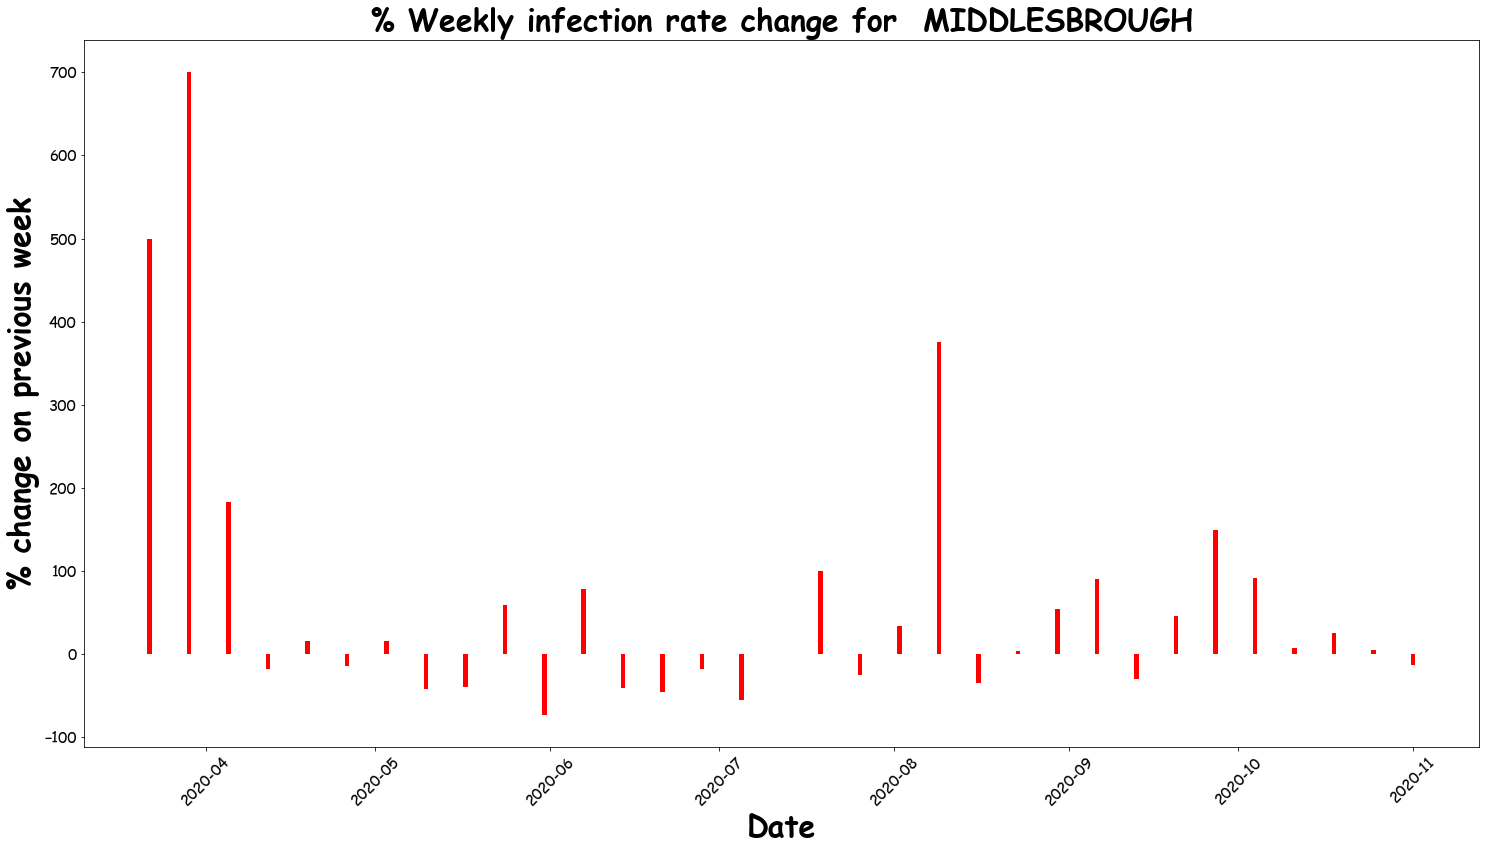

In [10]:
useful_functions.BarPlot(df3_week.index.values, df3_week["Percent Change in Cases"], title = f"% Weekly infection rate change for  {area_name.upper()}", ylabel= '% change on previous week', color='r')

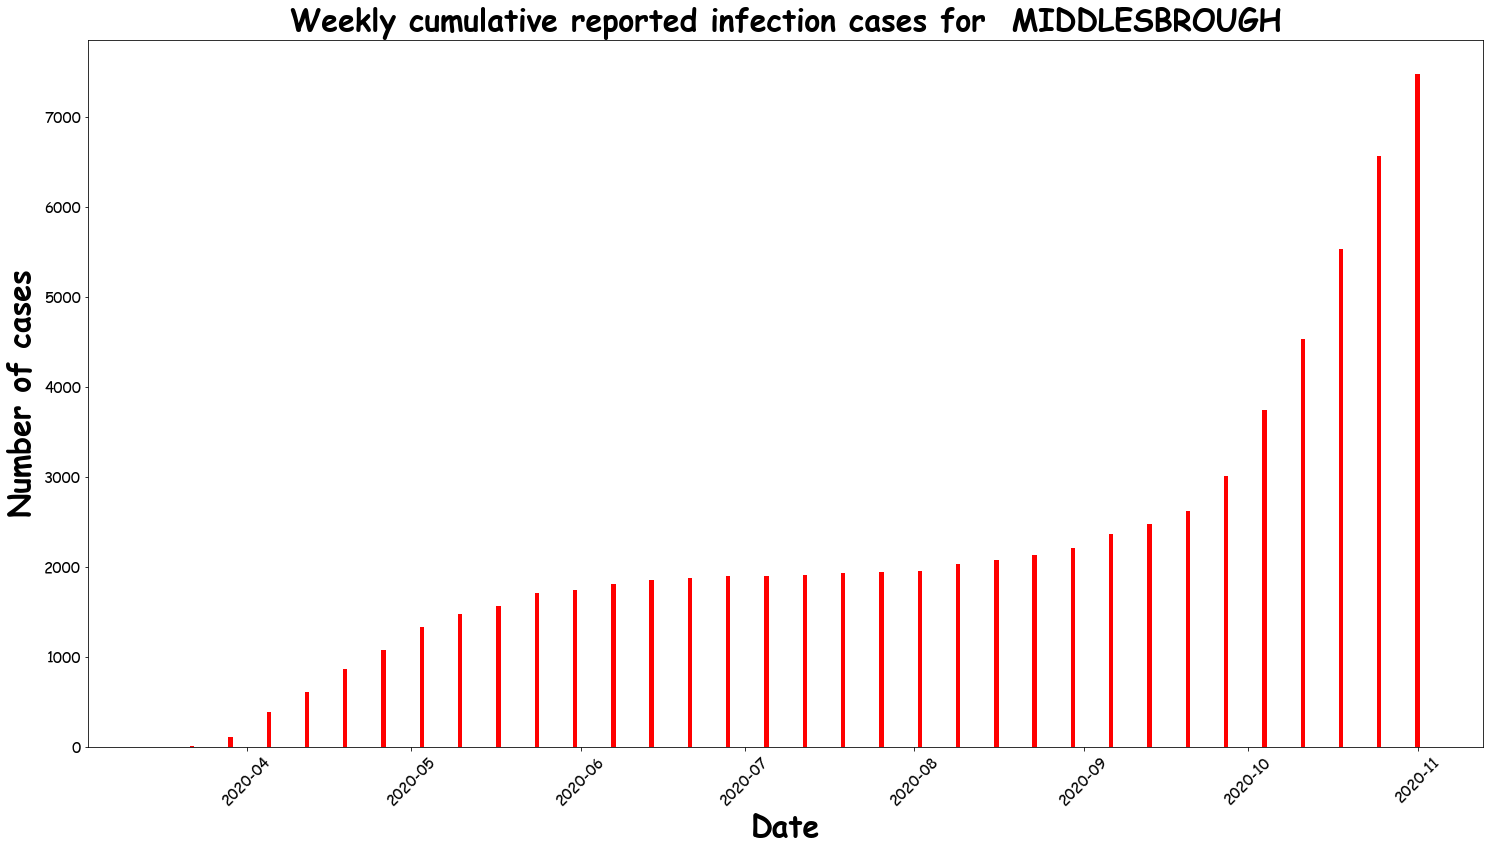

In [11]:
useful_functions.BarPlot(df3_week.index.values, df3_week["Cumulative Cases"], title = f"Weekly cumulative reported infection cases for  {area_name.upper()}", ylabel= 'Number of cases', color='r')

## 4. Monthly reported cases

In [12]:
df4 = df1.loc[:,["Date", "Total Cases"]]
df4.Date = pd.to_datetime(df4.Date)
df4.set_index('Date', inplace=True)

df4_month = df4.resample('MS').sum()
df4_month = df4_month.reset_index()


df4_month.rename(columns={'Date': 'Month starting on', 'Total Cases': 'Monthly Total Cases'}, inplace=True)
print('Total number of cases reported monthly')
df4_month.set_index('Month starting on', inplace=True)
df4_month

Total number of cases reported monthly


,Monthly Total Cases
Month starting on,
2020-03-01,176
2020-04-01,1080
2020-05-01,490
2020-06-01,148
2020-07-01,52
2020-08-01,296
2020-09-01,1020
2020-10-01,4120
2020-11-01,94


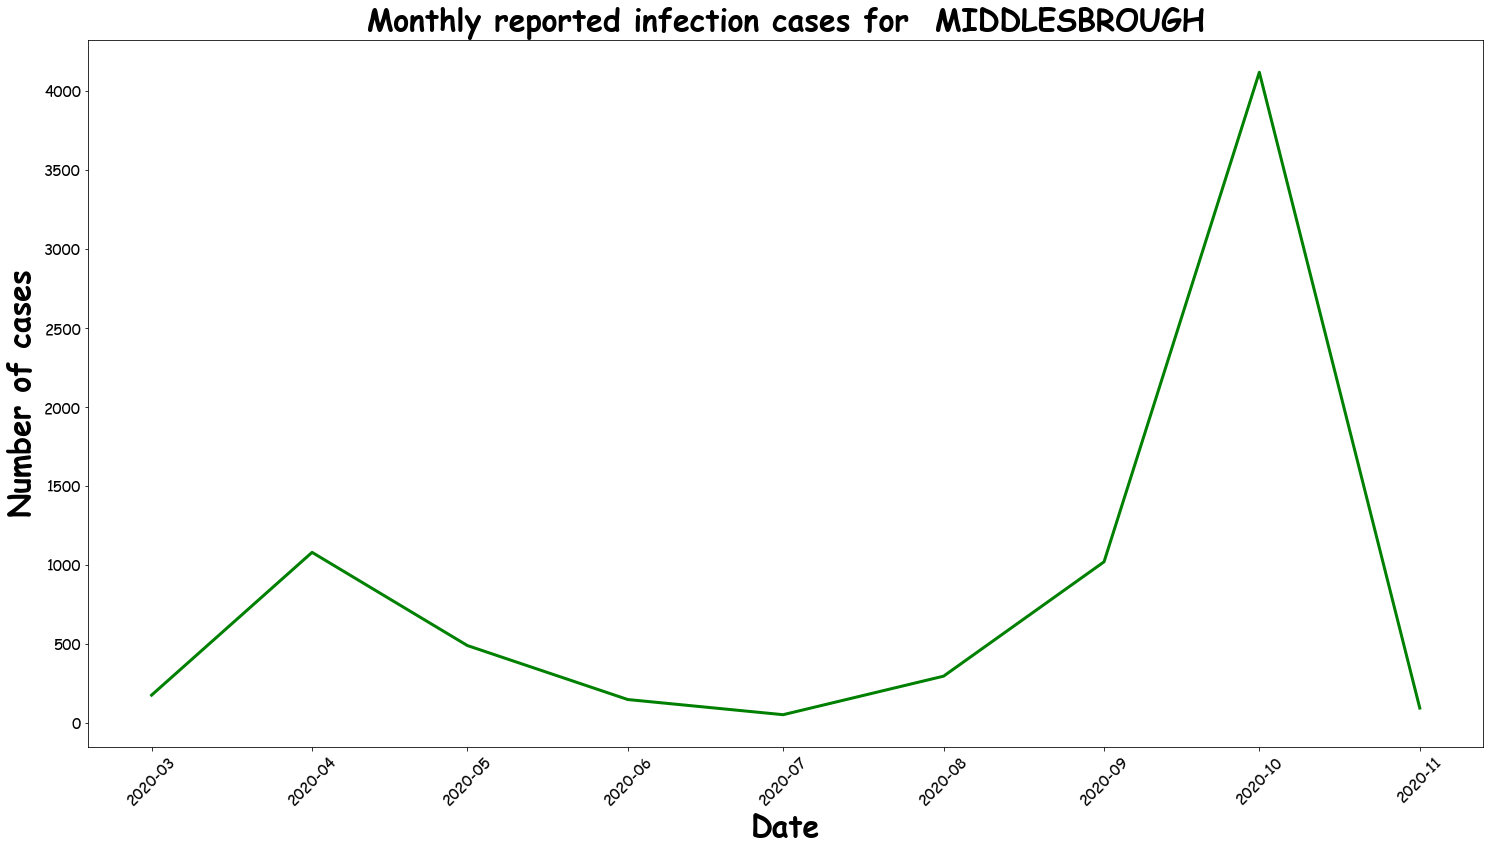

In [13]:
useful_functions.LinePlot(df4_month["Monthly Total Cases"], title = f"Monthly reported infection cases for  {area_name.upper()}", ylabel= 'Number of cases', color='g')

In [14]:
# Add columns showing percentage change and cumulative cases in recorded cases for monthly data.

df4_month['Percent Change in Cases'] =  round(df4_month['Monthly Total Cases'].pct_change() * 100,2)
df4_month['Cumulative Cases'] = df4_month['Monthly Total Cases'].cumsum()

df4_month

,Monthly Total Cases,Percent Change in Cases,Cumulative Cases
Month starting on,,,
2020-03-01,176,NaN,176
2020-04-01,1080,513.64,1256
2020-05-01,490,-54.63,1746
2020-06-01,148,-69.80,1894
2020-07-01,52,-64.86,1946
2020-08-01,296,469.23,2242
2020-09-01,1020,244.59,3262
2020-10-01,4120,303.92,7382
2020-11-01,94,-97.72,7476


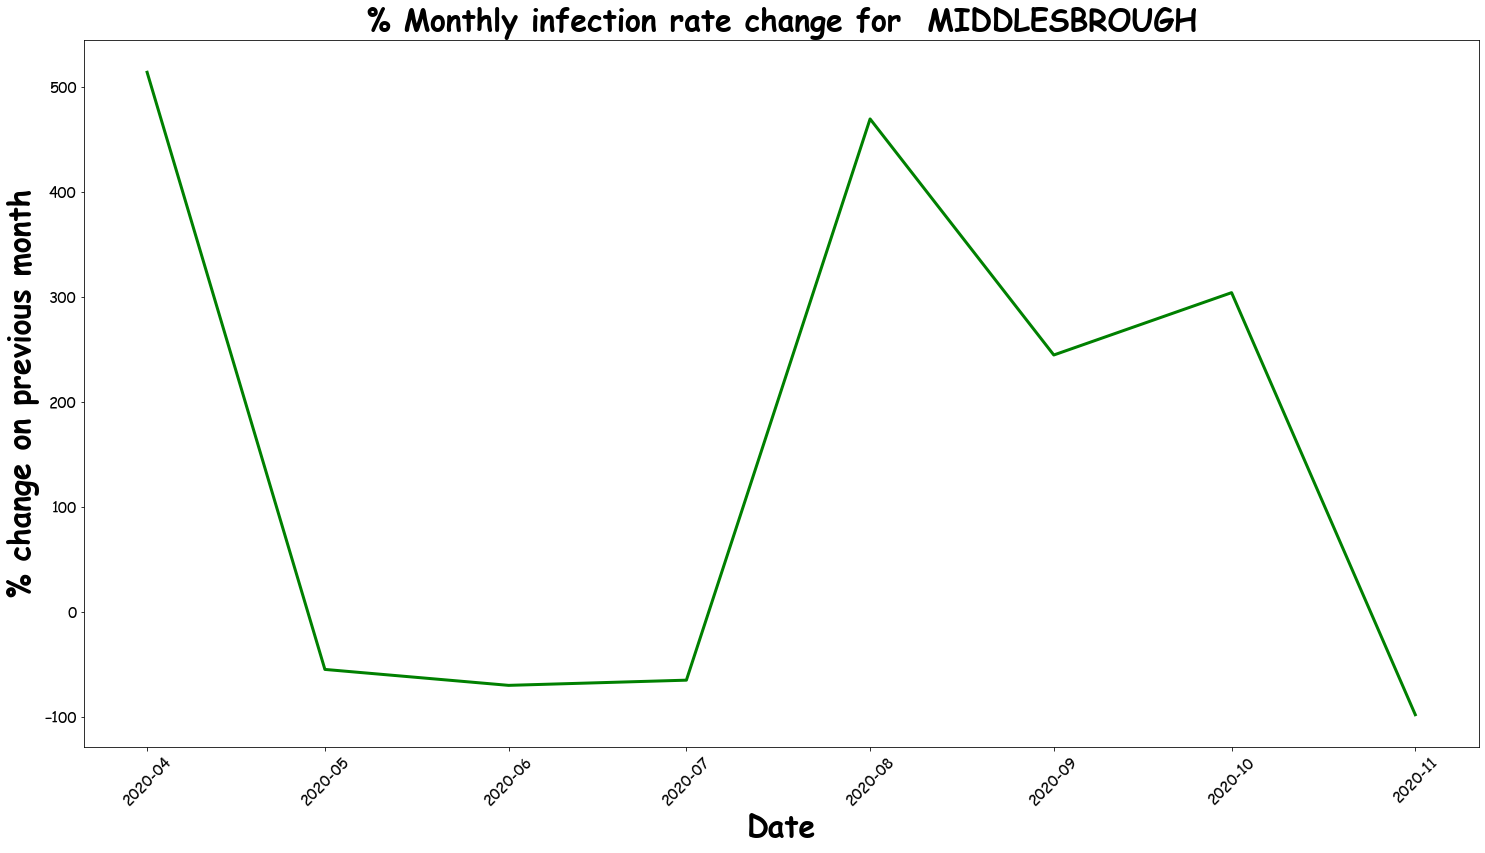

In [15]:
useful_functions.LinePlot(df4_month["Percent Change in Cases"], title = f"% Monthly infection rate change for  {area_name.upper()}", ylabel= '% change on previous month', color='g')

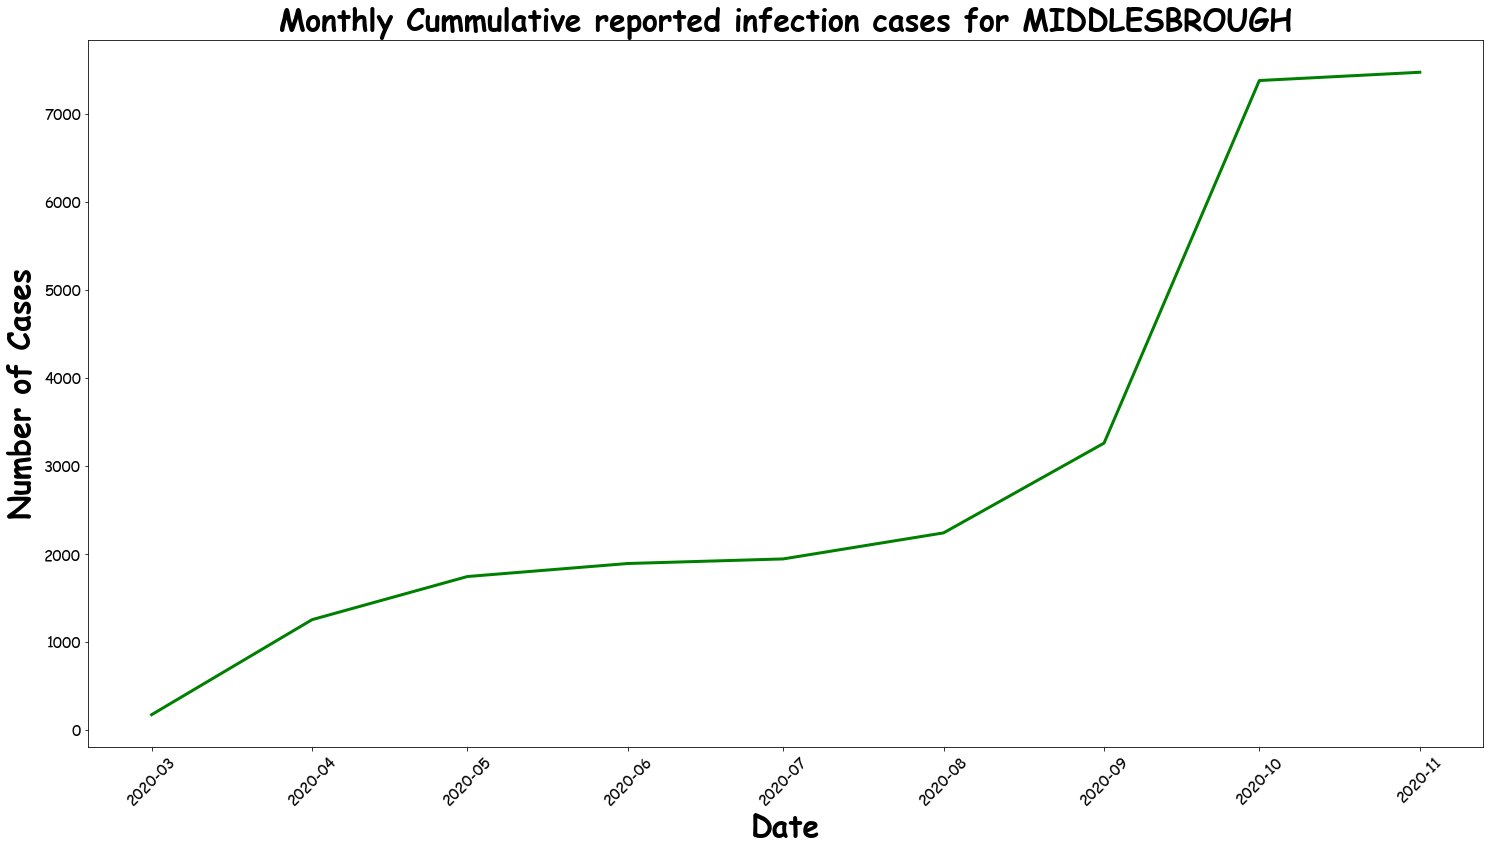

In [16]:
useful_functions.LinePlot(df4_month["Cumulative Cases"], title = f"Monthly Cummulative reported infection cases for {area_name.upper()}", ylabel= 'Number of Cases', color='g')

In [17]:
import numpy as np
df_useful2 = df_useful.copy()
df_useful2['Percent Change in Cases'] = round(df_useful2['Total Cases'].pct_change() * 100,2)
df_useful2 = df_useful2.replace([np.inf, -np.inf], np.nan)
df_useful2['Percent Change in Cases'] = df_useful2['Percent Change in Cases'].fillna(100)
df_useful2['Change in Cases'] = df_useful2['Total Cases'].diff().fillna(0) # Gets difference between subsequent days

df_useful2=df_useful2.drop_duplicates()
df_useful2.reset_index(drop=True, inplace=True)

df_useful2

,areaType,Area_Name,Date,NewCases_Age_0-4,NewCases_Age_5-9,NewCases_Age_10-14,NewCases_Age_15-19,NewCases_Age_20-24,NewCases_Age_25-29,NewCases_Age_30-34,...,NewCases_Age_75-79,NewCases_Age_80-84,NewCases_Age_85-89,NewCases_Age_90+,NewCases_Age_unassigned,NewCases_Age_0-59,NewCases_Age_60+,Total Cases,Percent Change in Cases,Change in Cases
0,ltla,hartlepool,2020-03-16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,100.00,0.0
1,ltla,hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-100.00,-1.0
2,ltla,hartlepool,2020-03-18,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,100.00,1.0
3,ltla,hartlepool,2020-03-19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-100.00,-1.0
4,ltla,hartlepool,2020-03-20,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,100.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115022,utla,worcestershire,2020-10-28,2,3,3,23,12,15,14,...,4,4,4,3,3,136,35,174,16.00,24.0
115023,utla,worcestershire,2020-10-29,4,2,6,6,12,13,20,...,1,3,1,0,3,137,25,165,-5.17,-9.0
115024,utla,worcestershire,2020-10-30,4,4,6,12,16,10,6,...,6,3,1,1,1,129,27,157,-4.85,-8.0
115025,utla,worcestershire,2020-10-31,6,1,7,14,8,13,11,...,2,1,1,0,0,108,17,125,-20.38,-32.0


In [18]:
#['ltla', 'nation', 'overview', 'region', 'utla']

df_ltla = df_useful2[df_useful2['areaType']=='ltla']
df_ltla.head(2)

,areaType,Area_Name,Date,NewCases_Age_0-4,NewCases_Age_5-9,NewCases_Age_10-14,NewCases_Age_15-19,NewCases_Age_20-24,NewCases_Age_25-29,NewCases_Age_30-34,...,NewCases_Age_75-79,NewCases_Age_80-84,NewCases_Age_85-89,NewCases_Age_90+,NewCases_Age_unassigned,NewCases_Age_0-59,NewCases_Age_60+,Total Cases,Percent Change in Cases,Change in Cases
0,ltla,hartlepool,2020-03-16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,100.0,0.0
1,ltla,hartlepool,2020-03-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-100.0,-1.0


#### 5. Areas with the highest number of cases on a given day

In [19]:
date = "2020-10-26"
       
df_date = df_ltla.loc[(df_ltla['Date'] == date) & (df_ltla['Total Cases']==df_ltla['Total Cases'].max()), ['Total Cases','Area_Name']]
print()
print(f"Below is the City with the highest number of cases on: {date}")
df_date


Below is the City with the highest number of cases on: 2020-10-26


,Total Cases,Area_Name
67381,616,leeds


#### 6. City with the largest percentage positive change of cases over a given date range

In [20]:
# Areas with the largest percentage positive change of cases over a given date range

df_date_range1 = df_useful2.loc[(df_useful2['Date'] >= '2020-10-11') & (df_useful2['Date'] <= '2020-10-17')]
df_date_range2 = df_date_range1.loc[(df_date_range1['Percent Change in Cases']==df_date_range1['Percent Change in Cases'].max()), ['Date','Area_Name','Total Cases','Percent Change in Cases']]
df_date_range2

,Date,Area_Name,Total Cases,Percent Change in Cases
37077,2020-10-12,melton,15,1400.0


#### 7. City with the largest positive change of cases over a given date range

In [21]:
# Areas with the largest positive change of cases over a given date range: '2020-10-11' to '2020-10-17

df_date_range1 = df_useful2.loc[(df_useful2['Date'] >= '2020-10-11') & (df_useful2['Date'] <= '2020-10-17') & (df_useful2['areaType'] == 'ltla') ]
df_date_range3 = df_date_range1.loc[(df_date_range1['Change in Cases']==df_date_range1['Change in Cases'].max()), ['Date','Area_Name','Total Cases','Change in Cases']]
df_date_range3

,Date,Area_Name,Total Cases,Change in Cases
67367,2020-10-12,leeds,529,248.0


### 7. Comparison of two areas concerning their daily change over a given date range

#### Date range: 2020-10-11 to 2020-10-17

Enter the first area name you wish to compare: middlesbrough

Enter the second area name you wish to compare: hartlepool


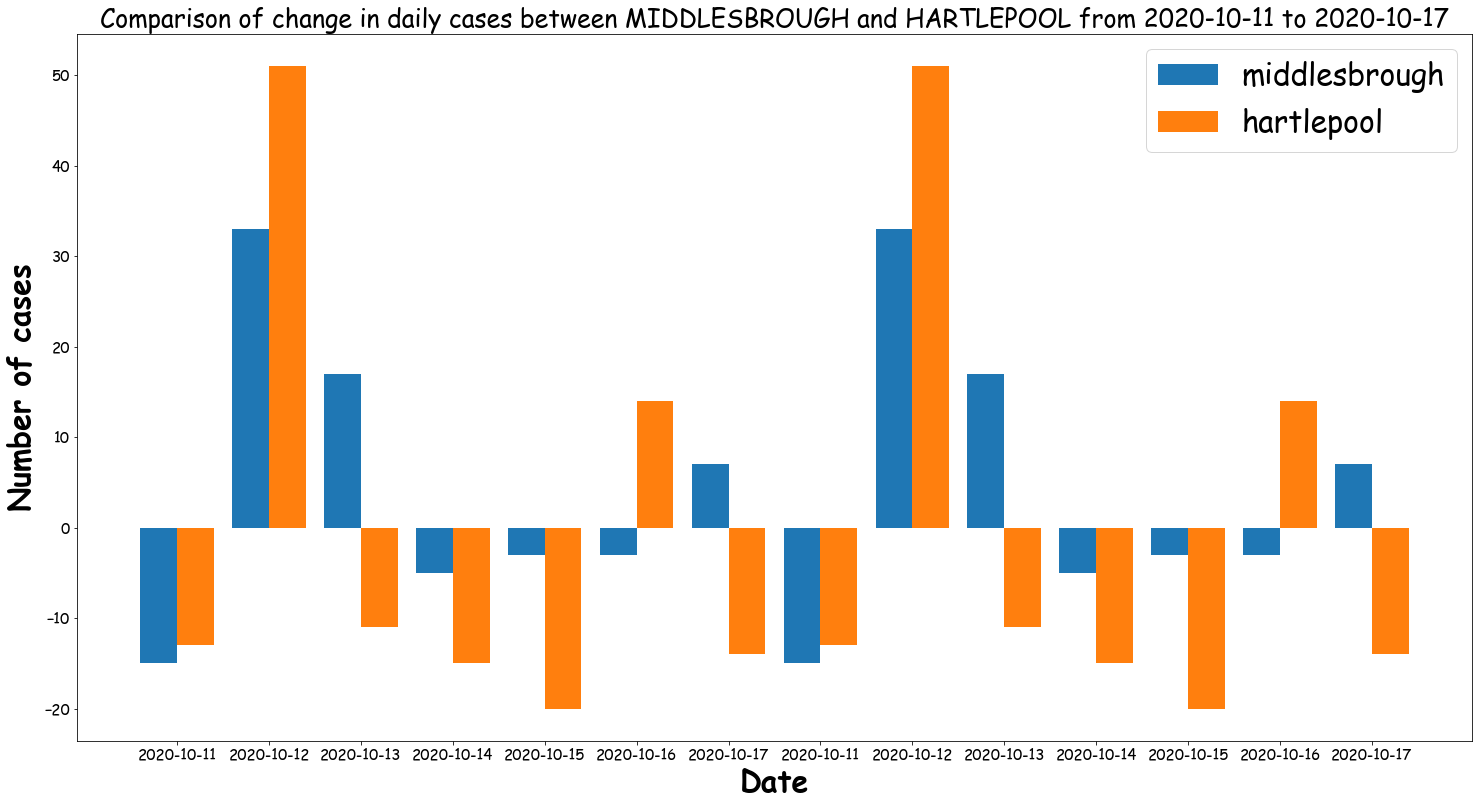

In [22]:
Area_list = df_useful["Area_Name"].unique() 

while True:
    area1 = input("Enter the first area name you wish to compare: ").lower()
    
    if area1 in Area_list:
        break
    else:
        print()
        print("Area name is either not available or wrongly spelt. Please try again.")
        
while True:
    print()
    area2 = input("Enter the second area name you wish to compare: ").lower()
    
    if area2 in Area_list:
        break
    else:
        print()
        print("Area name is either not available or wrongly spelt. Please try again.")


df_date_range1 = np.where((df_useful2['Area_Name'] == area1) & (df_useful2['Date'] >= '2020-10-11') & (df_useful2['Date'] <= '2020-10-17'))
df_date_range2 = np.where((df_useful2['Area_Name'] == area2) & (df_useful2['Date'] >= '2020-10-11') & (df_useful2['Date'] <= '2020-10-17'))

df_date_range3=df_useful2.loc[df_date_range1]
df_date_range4=df_useful2.loc[df_date_range2]

df_date_range3['Cumulative Cases'] = df_date_range3['Total Cases'].cumsum()
df_date_range4['Cumulative Cases'] = df_date_range4['Total Cases'].cumsum()

df_date_range3.Date = pd.to_datetime(df_date_range3.Date, format='%Y.%M.%d').dt.strftime('%Y-%m-%d')
#df_date_range3.set_index('Date', inplace=True)


# Comparison of two areas concerning their daily change over a given date range

plt.figure(figsize = (25,13))
X = df_date_range3['Date']
area_a = df_date_range3['Change in Cases']
area_b = df_date_range4['Change in Cases']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, area_a, 0.4, label = area1)
plt.bar(X_axis + 0.2, area_b, 0.4, label = area2)
  
plt.xticks(X_axis, X, size= 15)
plt.yticks(size= 15)
plt.xlabel('Date', fontsize =30, fontweight='bold')
plt.ylabel('Number of cases', fontsize =30, fontweight='bold')
plt.title(f"Comparison of change in daily cases between {area1.upper()} and {area2.upper()} from 2020-10-11 to 2020-10-17", fontsize =25)
plt.legend(fontsize=30)
plt.show()

## 5. Daily change in reported cases for the two selected areas

### Comparison of the two areas concerning their cumulative cases total over a given date range

#### Date range: 2020-10-11 to 2020-10-17

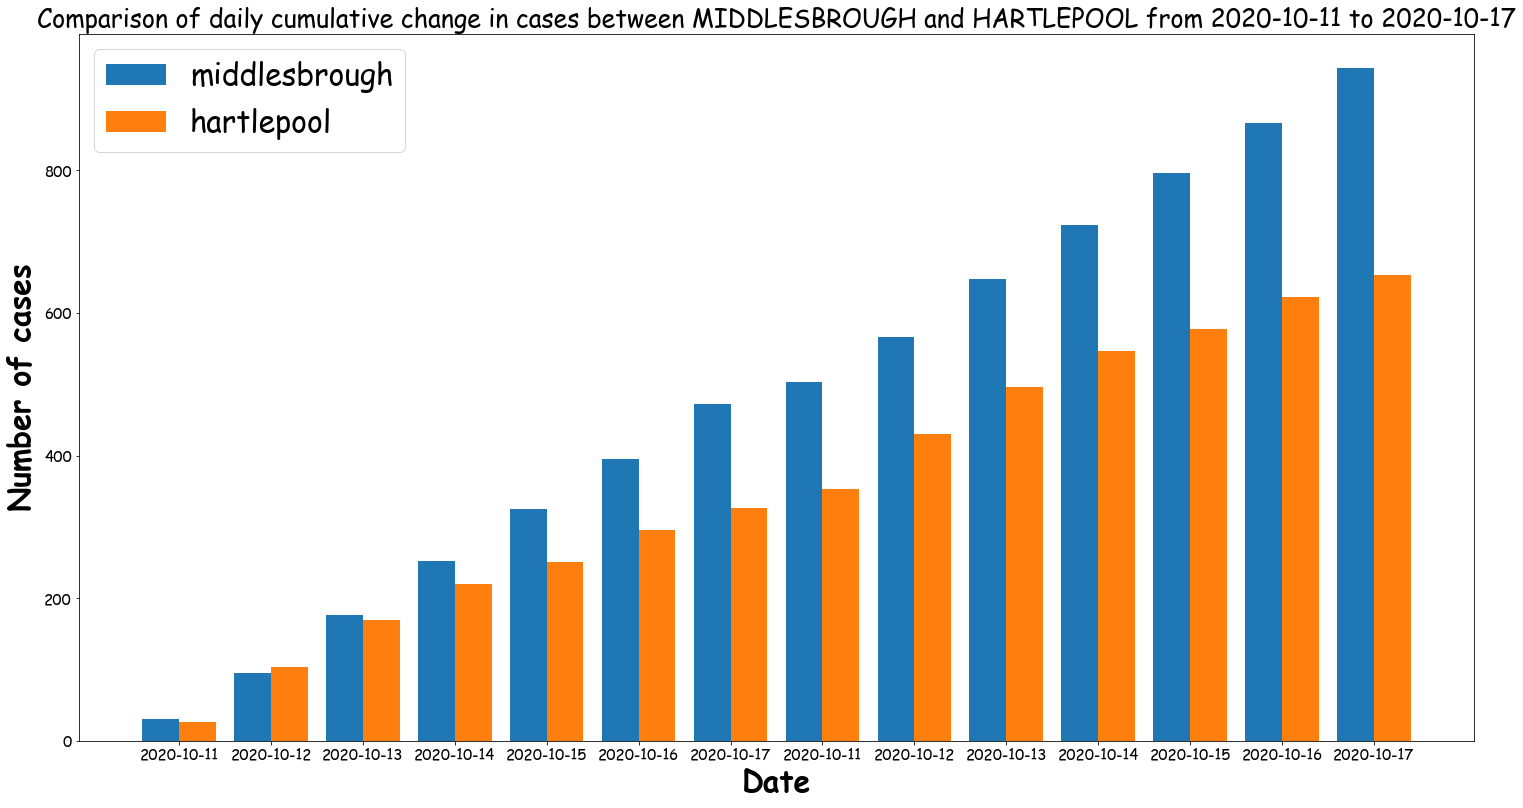

In [23]:
# Comparison of two areas concerning their cumulative cases total over a given date range

plt.figure(figsize = (25,13))
X = df_date_range3['Date']
area_a = df_date_range3['Cumulative Cases']
area_b = df_date_range4['Cumulative Cases']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, area_a, 0.4, label = area1)
plt.bar(X_axis + 0.2, area_b, 0.4, label = area2)
  
plt.xticks(X_axis, X, size= 15)
plt.yticks(size= 15)
plt.xlabel('Date', fontsize =30, fontweight='bold')
plt.ylabel('Number of cases', fontsize =30, fontweight='bold')
plt.title(f"Comparison of daily cumulative change in cases between {area1.upper()} and {area2.upper()} from 2020-10-11 to 2020-10-17", fontsize =25)
plt.legend(fontsize=30)
plt.show()